# 분류(Classification) - 붓꽃의 품종 판별

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import pandas as pd
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- target 속성 확인하기

In [32]:
print('데이터셋 크기', iris['target'].shape)

데이터셋 크기 (150,)


In [33]:
print('데이터셋 내용 : \n', iris['target'])

데이터셋 내용 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 데이터프레임 변환

In [34]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df['target'] = iris['target']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 데이터 탐색

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [39]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [40]:
df.duplicated().sum()

1

In [41]:
df.loc[df.duplicated(), :]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


In [42]:
df.loc[(df.sepal_length==5.8)&(df.sepal_width==2.7)&(df.petal_length==5.1), :]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


In [43]:
df = df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.sepal_width==2.7)&(df.petal_length==5.1), :]

,sepal_length,sepal_width,petal_length,petal_width,target
101,5.8,2.7,5.1,1.9,2


#### 상관관계 분석

In [44]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale =1.2)

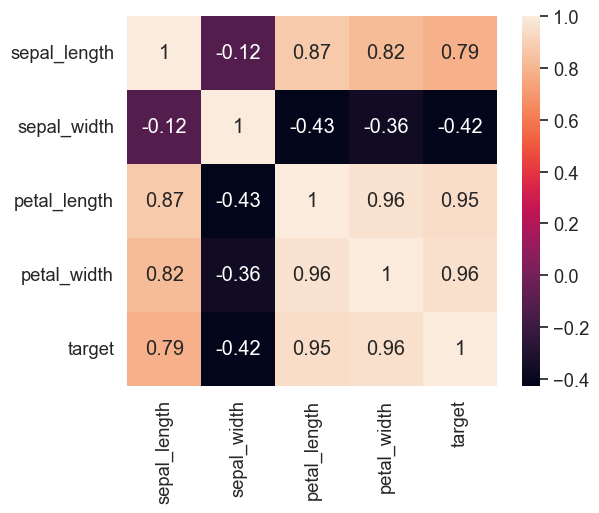

In [46]:
sns.heatmap(data=df.corr(), square=True, annot=True, cbar=True)
plt.show()

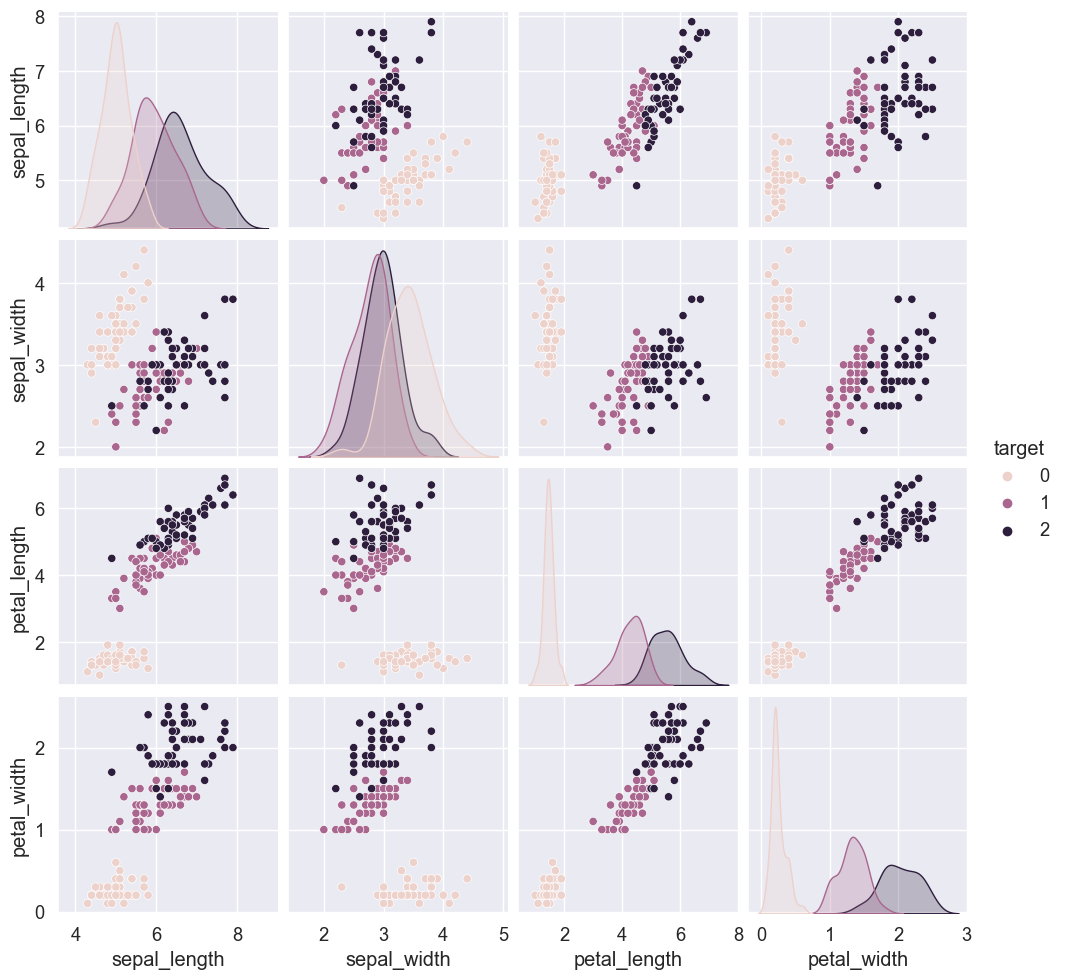

In [47]:
sns.pairplot(df, hue='target', size=2.5, diag_kind='kde')
plt.show()

#### train-test 데이터셋 분할

In [48]:
from sklearn.model_selection import train_test_split

X = df.loc[:, 'sepal_length':'petal_length']
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=20)
print(X_train.shape, y_train.shape)

(119, 3) (119,)


### 분류 알고리즘

#### 1) KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_knn_pred)
print('Accuacy : %.4f'%knn_acc)

Accuacy : 0.9000


In [50]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_knn5_pred = knn5.predict(X_test)
knn5_acc = accuracy_score(y_test, y_knn5_pred)
print('Accuacy : %.4f'%knn5_acc)

Accuacy : 0.9333


In [51]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_knn3_pred = knn3.predict(X_test)
knn3_acc = accuracy_score(y_test, y_knn3_pred)
print('Accuacy : %.4f'%knn3_acc)

Accuacy : 0.9667


#### 2) SVM (Support Vector Machine)

In [52]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf') #kernal:데이터를 벡터 공간으로 매핑하는 함수, rbf:Radial Basis Func. 
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_svc_pred)
print('Accuacy : %.4f'%svc_acc)

Accuacy : 0.9667


#### 3) 로지스틱 회귀

In [53]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
y_lrc_pred = lrc.predict(X_test)
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print('Accuacy : %.4f'%lrc_acc)

Accuacy : 0.9667


In [54]:
y_lrc_prob = lrc.predict_proba(X_test)
y_lrc_prob

array([[9.81271643e-01, 1.87282030e-02, 1.53878039e-07],
       [4.07839825e-03, 6.42028641e-01, 3.53892961e-01],
       [1.11502793e-02, 8.74936365e-01, 1.13913356e-01],
       [5.43569391e-05, 7.86815170e-02, 9.21264126e-01],
       [2.46112268e-02, 9.08914172e-01, 6.64746011e-02],
       [3.19719991e-02, 9.17850370e-01, 5.01776305e-02],
       [1.28068861e-05, 3.13980095e-02, 9.68589184e-01],
       [9.79970867e-01, 2.00289203e-02, 2.13143479e-07],
       [1.01519692e-05, 4.37598330e-02, 9.56230015e-01],
       [9.71181210e-01, 2.88185633e-02, 2.26194746e-07],
       [1.22418414e-04, 7.60880907e-02, 9.23789491e-01],
       [1.56188801e-03, 5.95533899e-01, 4.02904213e-01],
       [6.76187826e-04, 3.89722571e-01, 6.09601242e-01],
       [9.82104874e-01, 1.78950583e-02, 6.78484507e-08],
       [9.74279185e-01, 2.57206271e-02, 1.88211694e-07],
       [2.99870093e-03, 4.49324374e-01, 5.47676925e-01],
       [9.90433869e-01, 9.56610152e-03, 2.93927430e-08],
       [4.06790074e-03, 7.35893

#### 4) 의사결정나무 (Decision Tree)

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=20)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_dt_pred)
print('Accuacy : %.4f'%dt_acc)

Accuacy : 0.9000
